<a href="https://colab.research.google.com/github/luancsoliver/imersao.dados-alura/blob/main/Imersao_Dados_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# SKLEARN (Machine Learning)
# Professor recomendou dar uma lida nos materias para entender melhor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [38]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression='zip')  # pegou um arquivo zip e descompactou ele

mapa = {'droga':'composto'} # alterar o nome da coluna
dados.rename(columns=mapa, inplace=True)

resultados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-desafio-final/main/Dados/dados_resultados.csv')

In [39]:
resultados['n_moa'] = resultados.drop('id', axis=1).sum(axis=1)
resultados['ativo_moa'] = (resultados['n_moa'] != 0)
combinados = pd.merge(dados, resultados[['id', 'n_moa', 'ativo_moa']], on='id')
combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [40]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [41]:
# x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2)
# teste_size define a porgentagem dos datos destinadas à teste. No caso ele não usa esses 20% para o modelo
# para que não fique tendencioso de ele usar para teste os mesmos dados que ele usou para aprender
# dentro de train_test_split(x, y) existem 4 dataframes com os dados que nós pegamos na sequência antes do igual
# o treino do computador de x e y e os testes dos mesmos

In [42]:
x = combinados.select_dtypes('float64')  # seleciona tudo que tiver no DF com formato float
# no caso pegou todos os valores de g e c
y = combinados['ativo_moa']  # esse y é como se fosse o resultado. O que vc encontra de acordo com os valores de x
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino) # primeiro estava x e y, mas alteramos para que ele use os valores
# destinados para teste
modelo_rlogistica.score(x_teste, y_teste)

0.6267058576527399

fizemos o score de quantos % o computador consegui acertar e agora precisamos saber se isso é melhor do que fazer um teste tolo. No caso usamos o dummy com a premissa de escolher sempre o mais frequente e então comparamos quanto o teste tolo acertava com o quanto nosso modelo acertou.

In [43]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

Como a porcentagem de acerto do modelo tolo é praticamente igual ao nosso modelo, não podemos dizer que ele foi eficaz...

In [44]:
combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

O valor do teste tolo deu praticamente 60% porque nossos dados tem uma tendência maior para True, 60%. Se nossos dados fossem meio a meio 50%, o teste tolo, provavelmente, teria retornado essa porcentagem de acerto.

In [45]:
# agora vamos usar a árvore de decisão
x = combinados.select_dtypes('float64')
y = combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)
modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

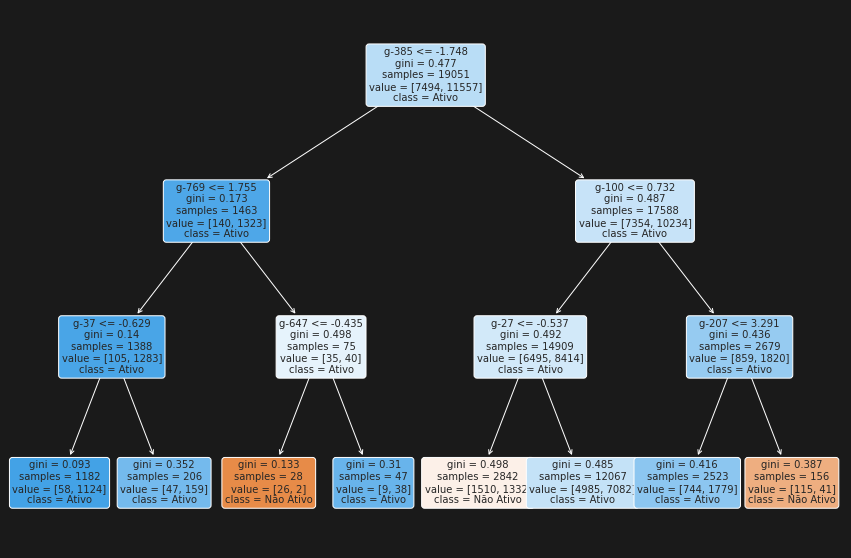

In [46]:
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativo', 'Ativo'])
plt.show()

In [47]:
x = combinados.select_dtypes('float64')
y = combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)
teste=[]
treino=[]
for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth=i)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))
# o depth da função da árvore significa profundidade, quanto maior seu valor, mais o modelo vai se aprofundar
# nos dados para ver se consegue gerar um modelo melhor

In [48]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6208272097417594,
 0.6197774511862272,
 0.6185177409195884,
 0.6206172580306529,
 0.6204073063195465,
 0.6164182238085241,
 0.6145286584085661,
 0.6113793827419693,
 0.5968927146756247,
 0.5992021834977955,
 0.597102666386731]

Podemos ver que meio que existe uma profundidade ótima que vai dar o valor máximo de score de 62%

In [49]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6606477350270327,
 0.6707259461445594,
 0.6895176106241142,
 0.706892026665267,
 0.7294105296309905,
 0.7530838276205973,
 0.7770720697076269,
 0.7991706472101202]

Os dados de treino vão melhorando cada vez mais pq ele vai pegando os valores e vai treinando com eles até ficar muito bom em prever valores dentro dos dados que ele já tem, mas quando ele tenta analisar dados novos ele não tem essa capacidade. No caso ocorre um overfit em que ele aprendeu muito com os dados fornecidos, mas não consegue aplicar em dados novos e desconhecidos.

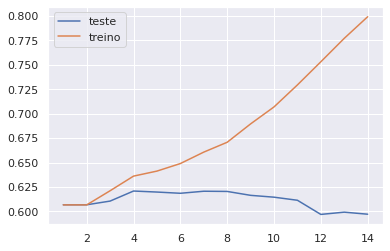

In [50]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')
# interessante que um gráfico ficou dentro do outro.
# outra questão importante é que no eixo x ele meio que simulou o que aconteceu dentro do for usando o range

e é isso que vemos no gráfico. Chege um ponto em que o treino continua crescendo, mas o teste vai decaindo.

Para evitar o overfit nós temos que usar outro tipo de modelo que é o random forest que cria várias árvores de forma aleatória

In [51]:
pd.get_dummies(combinados['tratamento'])
# esse comando faz com que ele gere 2 colunas com valores binários correspondentes aos valores string
# temos que fazer isso pq o modelo não consegue rodar tendo strings como dados a não ser True/False

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [52]:
pd.get_dummies(combinados, columns=['dose', 'tratamento', 'tempo'])
# transformar os dados string em binários. Melhor do que fazer oq eu havia feito na aula passada

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,dose_D1,dose_D2,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,1,0,0,1,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,1,0,0,1,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,1,0,0,1,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,1,0,0,1,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.

In [53]:
x = combinados.drop(['id','n_moa','ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6850724333403317

Refazendo o modelo de regressão logística para ver qual o resultado agora

In [54]:
x = combinados.drop(['id','n_moa','ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino) # primeiro estava x e y, mas alteramos para que ele use os valores
# destinados para teste
modelo_rlogistica.score(x_teste, y_teste)

0.6640772622296872

melhorou um pouco.

###Desafio 01: tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

###Desafio 02: Estude a documentação do Sklearn

###Desafio 03: Pesquisar o fluxograma chosing the right estimator. Um fluxograma que te ajuda a escolher o melhor modelo para o seu tipo de dado

###Desafio 04: Teste outros problemas (perguntas). 0, 1 ou + No lugar de usar a coluna que diz se foi ativo ou não por algum dos métodos, escolher um método (substância) e ver se o modelo consegue acertar mais com ela

###Desafio 05: Escolha a droga mais utilizada e tente criar um modelo para prever a label com_controle, com_droga.

###Desafio 06: Resumo do que você aprendeu com os dados.

#Desafios 1, 2 e 4

In [55]:
x = combinados.drop(['id','n_moa','ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['n_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_rsgd = SGDRegressor(max_iter=1000, loss='huber')
modelo_rsgd.fit(x_treino, y_treino)
modelo_rsgd.score(x_teste, y_teste)

0.13386134193346777

Esse modelo foi péssimo para esses dados

In [56]:
x = combinados.drop(['id','n_moa','ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['n_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_ridge = Ridge(max_iter=1000)
modelo_ridge.fit(x_treino, y_treino)
modelo_ridge.score(x_teste, y_teste)

0.2297515362637068

Também não deu certo... Vou tentar o modelo usado em aula para o n_moa

In [57]:
x = combinados.drop(['id','n_moa','ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['n_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6124291412975016

Como ele é um modelo de lógica, tipo 0 ou 1, acho que não dá muito certo para n_moa.

In [58]:
x = combinados.drop(['id','n_moa','ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['n_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.6275456644971656

Deu algo semelhante ao ativo_moa. Seguindo a dica do colega Gustavo eu vou tentar plotar o gráfico para ver a importância de cada variável na estimativa

Text(0.5, 0, 'Valor de importância')

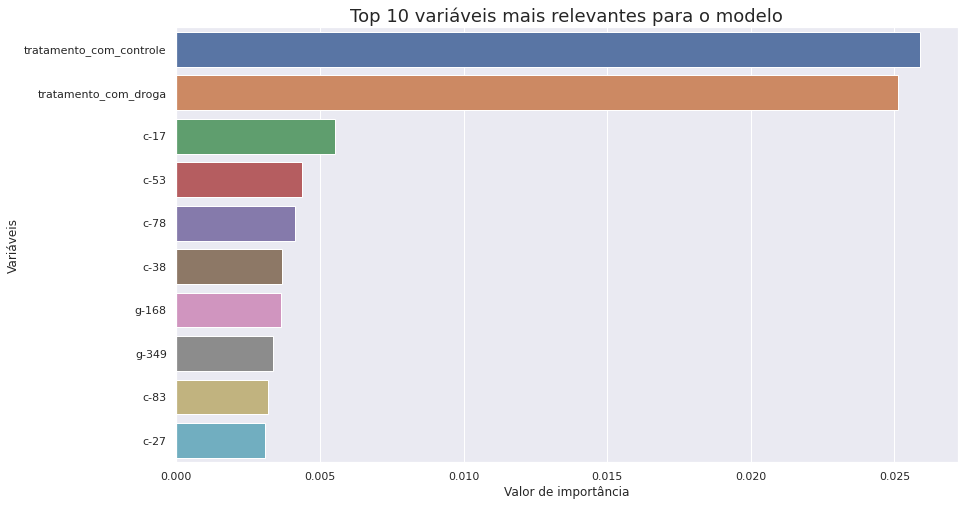

In [59]:
max_values_10_idx = pd.Series(modelo_randomforest.feature_importances_).sort_values(ascending=False)[:10].index

plt.figure(figsize=(14,8))

ax = sns.barplot(x=modelo_randomforest.feature_importances_[max_values_10_idx],
                 y=x.columns[max_values_10_idx])

plt.title('Top 10 variáveis mais relevantes para o modelo', fontsize=18)
plt.ylabel('Variáveis')
plt.xlabel('Valor de importância')

Vou tentar com o neighbors indicado pelos professores para ver o resultado

In [61]:
n_neighbors = 3

clf = KNeighborsClassifier(n_neighbors)
clf.fit(x_treino, y_treino)
clf.score(x_teste, y_teste)

0.564560151165232

Para o meu caso teve uma resposta pior. Acho que o melhor msm é o RandomForest

#Desafio 5

In [62]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
796f6988f       1
42feaa183       1
7a2ea4684       1
36dc71f82       1
98c94f9b9       1
Name: composto, Length: 3289, dtype: int64

In [66]:
dados_exp = combinados.query('composto == "87d714366"')
dados_pro = combinados.query('composto == "cacb2b860"')
dados_exp = pd.concat([dados_exp, dados_pro], axis=0)
dados_exp['composto'].value_counts() # deu certo!

cacb2b860    1866
87d714366     718
Name: composto, dtype: int64

In [74]:
x = dados_exp.drop(['id','n_moa','ativo_moa', 'composto', 'tratamento'], axis=1)
dadosy = pd.get_dummies(dados_exp, columns=['tratamento'])
x = pd.get_dummies(x, columns=['dose', 'tempo'])
y = dadosy['tratamento_com_droga']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

1.0

Bem, com somente um tipo de droga ele acerta sempre. Então eu acho que foi legal. Vamos ver oq o gráfico de importância diz sobre quais variáveis influenciaram mais.

Text(0.5, 0, 'Valor de importância')

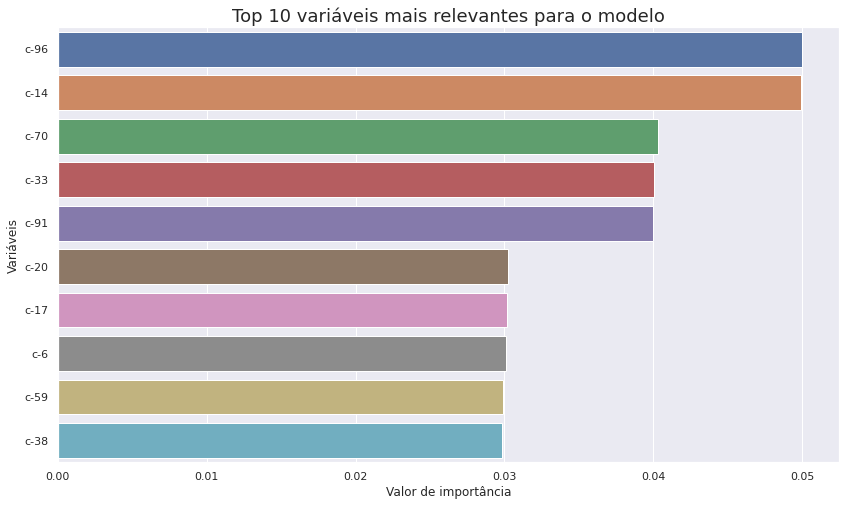

In [75]:
max_values_10_idx = pd.Series(modelo_randomforest.feature_importances_).sort_values(ascending=False)[:10].index

plt.figure(figsize=(14,8))

ax = sns.barplot(x=modelo_randomforest.feature_importances_[max_values_10_idx],
                 y=x.columns[max_values_10_idx])

plt.title('Top 10 variáveis mais relevantes para o modelo', fontsize=18)
plt.ylabel('Variáveis')
plt.xlabel('Valor de importância')

Agora considerando todos os compostos, vamos ver se ela vai se sair tão bem assim:

In [77]:
x = dados_exp.drop(['id','n_moa','ativo_moa', 'composto', 'tratamento'], axis=1)
dadosy = pd.get_dummies(dados_exp, columns=['tratamento'])
x = pd.get_dummies(x, columns=['dose', 'tempo'])
y = dadosy['tratamento_com_droga']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

1.0

Text(0.5, 0, 'Valor de importância')

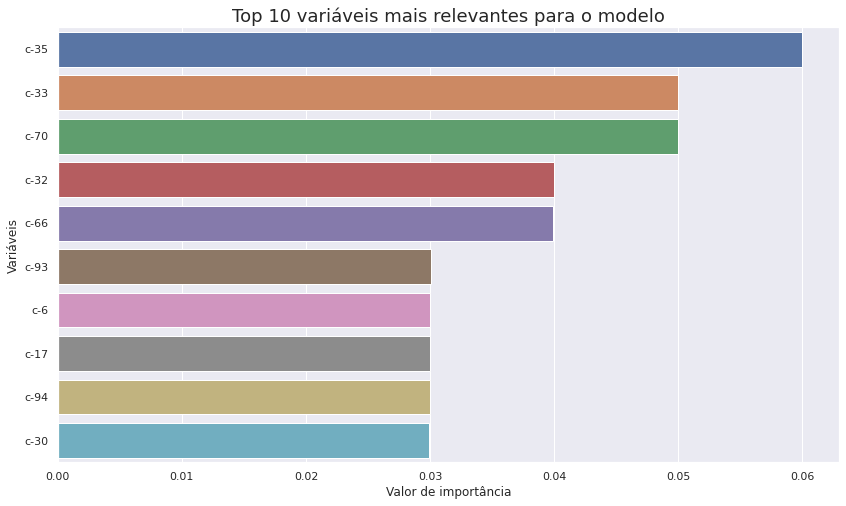

In [78]:
max_values_10_idx = pd.Series(modelo_randomforest.feature_importances_).sort_values(ascending=False)[:10].index

plt.figure(figsize=(14,8))

ax = sns.barplot(x=modelo_randomforest.feature_importances_[max_values_10_idx],
                 y=x.columns[max_values_10_idx])

plt.title('Top 10 variáveis mais relevantes para o modelo', fontsize=18)
plt.ylabel('Variáveis')
plt.xlabel('Valor de importância')

Pelo visto é bem fácil acertar se é ou não tratamento rsrs

#Desafio 6
Olha, nessa aula eu aprendi como funciona o ML, ou pelo menos vi ele funcionando. Acredito que tenha muito o que eu aprender lendo o sckitlearn e colocando em prática. Foi muito massar ver ele aprendendo com dados e tentando inferir valores de acordo com modelos. Na eng. florestal eu aprendi sobre os modelos de regressão e sempre criamos fórmulas para poder prever produções futuras de monocultura de florestas, mas o ML vai além disso e eu pretendo aprender mais disso para aplicar na área florestal e ambiental. Muito obrigado msm por essa semana! Adorei aprender mais!